<a href="https://www.kaggle.com/code/anderaraujo/new-market-requires-a-new-clustering?scriptVersionId=110639859" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# New market requires a new clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import seaborn as sns

# Importing Data

In [2]:
df_train = pd.read_csv('../input/customer/Train.csv')
df= pd.read_csv('../input/customer/Test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [4]:
# How many clusters are in the existing market?

df_train.Segmentation.nunique()

4

# Preprocessing data

In [5]:
#preprocessing test

df.drop('ID', axis = 1, inplace = True)
df['Var_1'] = df.Var_1.str.extract(r'(\d)').astype('float64')
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,6.0
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,6.0
2,Female,Yes,69,No,NaN,0.0,Low,1.0,6.0
3,Male,Yes,59,No,Executive,11.0,High,2.0,6.0
4,Female,No,19,No,Marketing,NaN,Low,4.0,6.0


In [6]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object' ]
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [7]:
oe = OrdinalEncoder()
ss = StandardScaler()
si = SimpleImputer(strategy = 'most_frequent')

In [8]:
df1 = df.copy()

In [9]:
dt = si.fit_transform(df1)
df1 = pd.DataFrame(data = dt, columns = df.columns)

In [10]:
df1[cat_cols] = oe.fit_transform(df1[cat_cols])

In [11]:
df1 = df1.astype('float64')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   float64
 1   Ever_Married     2627 non-null   float64
 2   Age              2627 non-null   float64
 3   Graduated        2627 non-null   float64
 4   Profession       2627 non-null   float64
 5   Work_Experience  2627 non-null   float64
 6   Spending_Score   2627 non-null   float64
 7   Family_Size      2627 non-null   float64
 8   Var_1            2627 non-null   float64
dtypes: float64(9)
memory usage: 184.8 KB


In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,2627.00000,2627.00000,2627.00000,2627.00000,2627.00000,2627.00000,2627.00000,2627.00000,2627.00000
mean,0.54206,0.59764,43.64979,0.61896,2.79330,2.39360,1.37724,2.78987,5.13590
std,0.49832,0.49047,16.96701,0.48574,2.58509,3.20016,0.84322,1.52736,1.40537
min,0.00000,0.00000,18.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
25%,0.00000,0.00000,30.00000,0.00000,0.00000,0.00000,1.00000,2.00000,4.00000
50%,1.00000,1.00000,41.00000,1.00000,2.00000,1.00000,2.00000,2.00000,6.00000
75%,1.00000,1.00000,53.00000,1.00000,5.00000,3.00000,2.00000,4.00000,6.00000
max,1.00000,1.00000,89.00000,1.00000,8.00000,14.00000,2.00000,9.00000,7.00000


# Finding better cluster

In [14]:
max_clusters = 10

In [15]:
kmeans = [KMeans(n_clusters = i) for i in range(1, max_clusters)]

In [16]:
inertias = [kmeans[i].fit(df1).inertia_ for i in range(len(kmeans))]

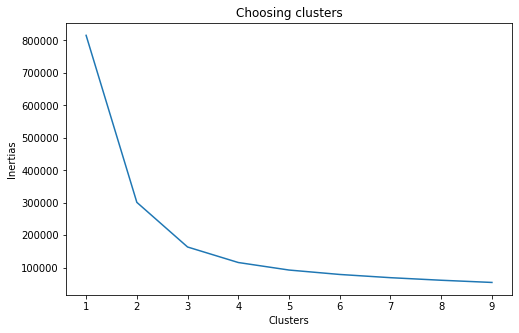

In [17]:
plt.figure(figsize = (8,5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel('Clusters')
plt.ylabel('Inertias')
plt.title('Choosing clusters')
plt.show()

# Fitting and predicting

In [18]:
km = KMeans(n_clusters = 3)

In [19]:
km.fit(df1)

KMeans(n_clusters=3)

In [20]:
km_pred = km.predict(df1)

In [21]:
df1['Cluster'] = km_pred + 1 
df1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,0.00000,1.00000,36.00000,1.00000,2.00000,0.00000,2.00000,1.00000,6.00000,2
1,1.00000,1.00000,37.00000,1.00000,5.00000,8.00000,0.00000,4.00000,6.00000,3
2,0.00000,1.00000,69.00000,0.00000,0.00000,0.00000,2.00000,1.00000,6.00000,1
3,1.00000,1.00000,59.00000,0.00000,4.00000,11.00000,1.00000,2.00000,6.00000,1
4,0.00000,0.00000,19.00000,0.00000,8.00000,1.00000,2.00000,4.00000,6.00000,2
...,...,...,...,...,...,...,...,...,...,...
2622,1.00000,0.00000,29.00000,0.00000,5.00000,9.00000,2.00000,4.00000,6.00000,2
2623,0.00000,0.00000,35.00000,1.00000,1.00000,1.00000,2.00000,1.00000,6.00000,2
2624,0.00000,0.00000,53.00000,1.00000,3.00000,1.00000,2.00000,2.00000,6.00000,3
2625,1.00000,1.00000,47.00000,1.00000,4.00000,1.00000,1.00000,5.00000,4.00000,3


# Visualizing differences between clusters

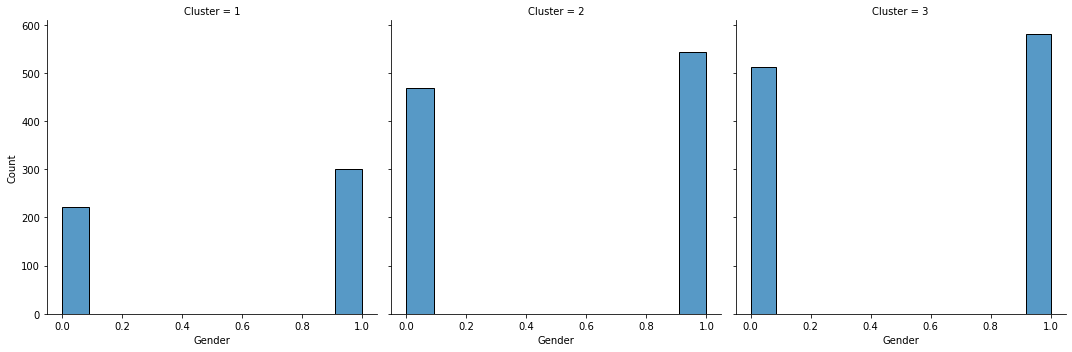

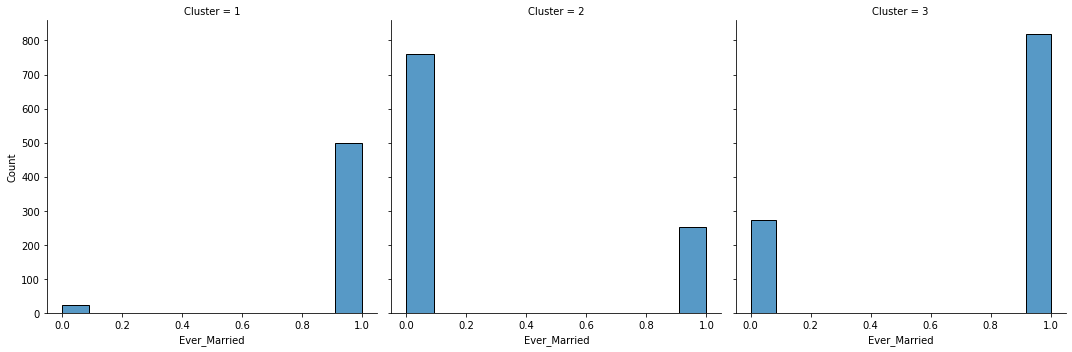

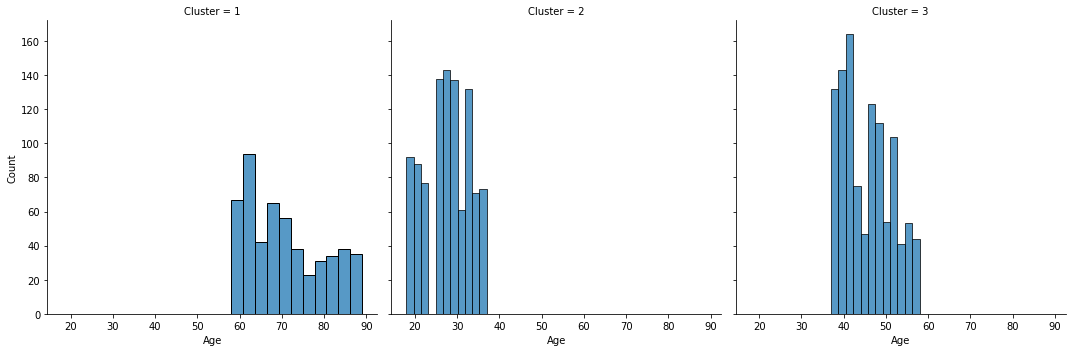

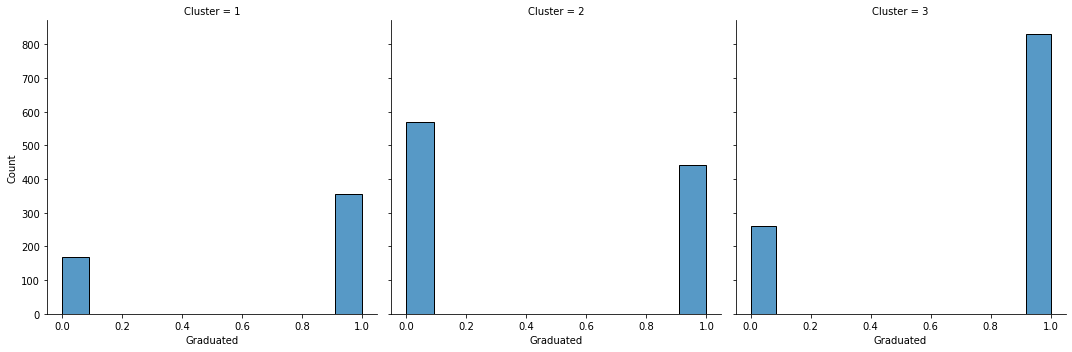

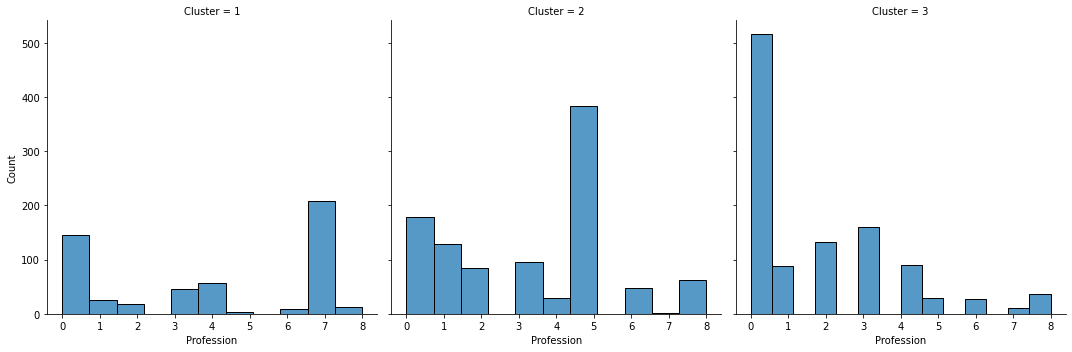

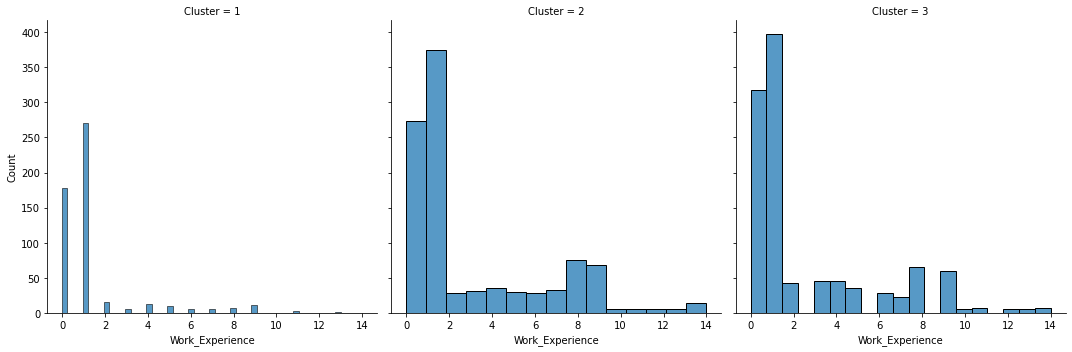

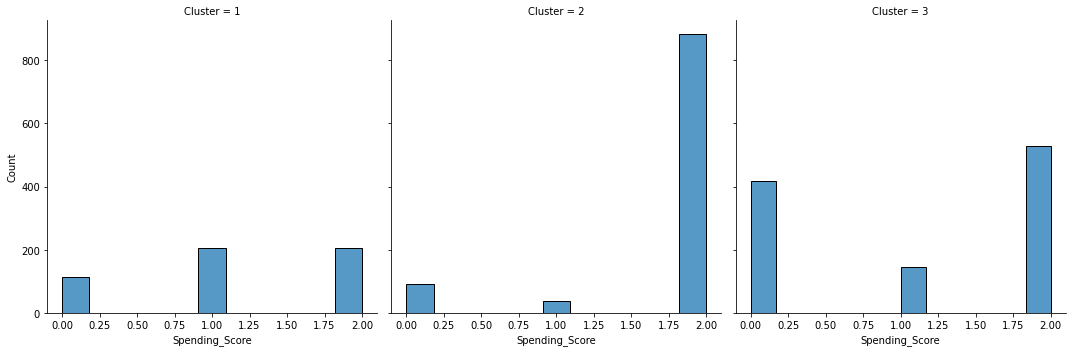

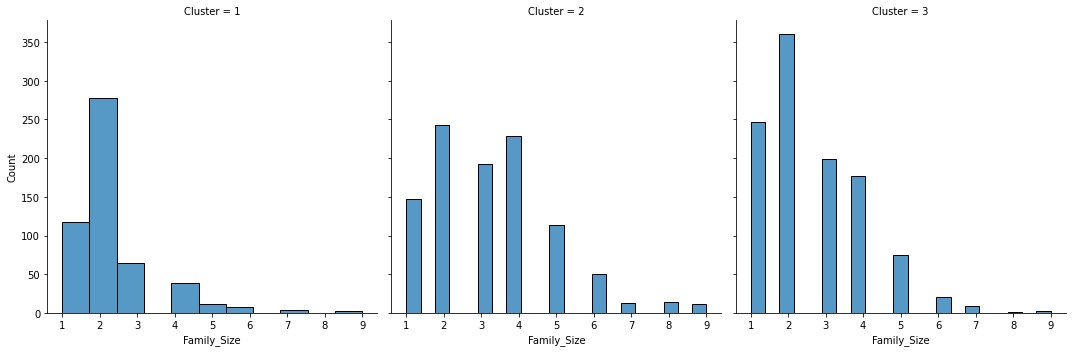

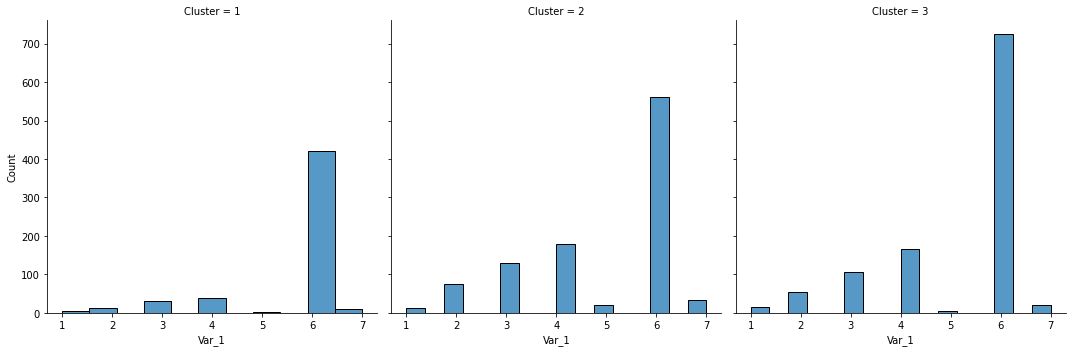

In [22]:
for i in df1.drop('Cluster', axis = 1):
    g = sns.FacetGrid(df1, col= 'Cluster', height=5, aspect= 1)
    g.map(sns.histplot, i)